<a href="https://colab.research.google.com/github/fikrialghany/ModelCrowdfunding/blob/main/text_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import time

import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data=pd.read_csv("/content/drive/My Drive/DATA/CROWDFUNDING/fake_job_postings.csv",encoding='cp850')

# Data Preprocessing

In [3]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI ÔÇô Environmental Systems Re...,"EDUCATION:┬áBachelorÔÇÖs or MasterÔÇÖs in GIS,...",Our culture is anything but corporateÔÇöwe hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Part 1: Concatenating Text Parts
First, we'll start with dropping redundant features and concatenate others.

In [4]:
x = data.loc[:,["company_profile","description","requirements","benefits"]]
y = data["fraudulent"]


* As we've seen from information table, there are NaN values in the set. We'll fill them with spaces.

In [5]:
x.fillna(" ",inplace=True)
x.isnull().sum()

company_profile    0
description        0
requirements       0
benefits           0
dtype: int64

* Now let's concatenate texts.

In [6]:
concat_data = []
for i in range(len(x)):
    txt = x["company_profile"][i] + " "
    txt = txt + x["description"][i] + " "
    txt = txt + x["requirements"][i] + " "
    txt = txt + x["benefits"][i]
    concat_data.append(txt.strip())

   

* Now let's check our data

In [7]:
concat_data[0]

"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub,

* There are too many information here, let's move on to the next step.

### Part 2: Cleaning Texts Using Regular Expressions
As you can see in the texts there are too many redundant characters such as punctuation steps. In this part we'll clear texts using regular expressions.

In [8]:
pattern = "[^a-zA-Z]"
cleanedTexts = []
for text in concat_data:
    text = re.sub(pattern," ",text)
    cleanedTexts.append(text.lower())


In [9]:
cleanedTexts[0]

'we re food    and we ve created a groundbreaking and award winning cooking site  we support  connect  and celebrate home cooks  and give them everything they need in one place we have a top editorial  business  and engineering team  we re focused on using technology to find new and better ways to connect people around their specific food interests  and to offer them superb  highly curated information about food and cooking  we attract the most talented home cooks and contributors in the country  we also publish well known professionals like mario batali  gwyneth paltrow  and danny meyer  and we have partnerships with whole foods market and random house food   has been named the best food website by the james beard foundation and iacp  and has been featured in the new york times  npr  pando daily  techcrunch  and on the today show we re located in chelsea  in new york city  food    a fast growing  james beard award winning online food community and crowd sourced and curated recipe hub 

### Part 3: Tokenizing and Padding
You know, in natural languages words are the representation of everything, such as we say *hi* when we see someone, h and i letters don't have any special meaning but hi has a special meaning. If 1 means hi, we can use it instead of hi.

In this part we'll convert words into integers and texts into sequences. 
In deep learning we generally use dataset that has predefined shape. But in text dataset shapes might be different, such as one jobposting can have 100 words other can have 102 words. In order to solve this problem we can use different approaches, but in this kernel we'll use **padding**

In padding we will add some spaces to the texts and make all texts with same shape.

In [10]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(cleanedTexts)

x_tokens = tokenizer.texts_to_sequences(cleanedTexts)

In [11]:
print(x_tokens[0])

[9, 53, 495, 1, 9, 407, 986, 4, 3873, 1, 876, 972, 2805, 312, 9, 79, 1371, 1, 4237, 214, 3773, 1, 687, 146, 820, 137, 166, 6, 95, 469, 9, 24, 4, 237, 2054, 34, 1, 156, 21, 9, 53, 488, 14, 151, 74, 2, 505, 40, 1, 479, 1000, 2, 1371, 54, 236, 43, 497, 495, 1931, 1, 2, 168, 146, 3386, 185, 3774, 141, 76, 495, 1, 2805, 9, 2515, 3, 178, 324, 214, 3773, 1, 5408, 6, 3, 1018, 9, 106, 3016, 86, 1640, 442, 121, 7213, 7316, 7124, 7125, 1, 7126, 7317, 1, 9, 24, 1142, 7, 1440, 2461, 182, 1, 5061, 646, 495, 105, 325, 2329, 3, 99, 495, 240, 39, 3, 4997, 6114, 1366, 1, 7318, 1, 105, 325, 3509, 6, 3, 40, 671, 804, 7127, 7319, 310, 4871, 1, 14, 3, 518, 1220, 9, 53, 457, 6, 6063, 6, 40, 671, 613, 495, 4, 124, 112, 4997, 6114, 876, 972, 150, 495, 260, 1, 4902, 5734, 1, 3774, 7320, 3387, 11, 351, 2377, 96, 1, 120, 49, 6491, 2136, 2, 19, 6, 4, 259, 21, 5, 4754, 1375, 1, 448, 6, 224, 40, 671, 613, 1938, 1, 18, 339, 495, 212, 8, 4, 536, 5, 472, 877, 193, 15, 839, 3577, 1, 67, 6, 43, 340, 212, 44, 2796, 1, 878

* Now let's create a sequence that includes length of arrays and find Q3 value.

In [12]:
seq_lens = [len(seq) for seq in x_tokens]
q3 = np.quantile(seq_lens,.75)
print(q3)

502.0


* All texts will have shape 502

In [13]:
x_tokens_pad = np.asarray(pad_sequences(x_tokens,maxlen=int(q3)))

In [14]:
x_tokens_pad.shape

(17880, 502)

### Step 4: Train Test Splitting
In this section we'll split the dataset into train and test, to test dataset truly.

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x_tokens_pad,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304, 502)
(3576, 502)
(14304,)
(3576,)


# Building Model
In this section I am going to build the model using keras API of Tensorflow. I'll use the developed version of RNNs, GRU, Gated Recurrent Unit. We don't use SimpleRNN, because it has a problem called *vanishing gradient* because of backpropagation.


In [16]:
VOCAB_SIZE = 10000 + 1
VEC_SIZE = 100
TOKEN_SIZE = int(q3)


In [17]:
from tensorflow.compat.v1.keras.layers import CuDNNGRU
model = keras.Sequential()
model.add(layers.Embedding(input_dim=VOCAB_SIZE,
                           output_dim=VEC_SIZE,
                           input_length=TOKEN_SIZE
                          ))



model.add(CuDNNGRU(512,return_sequences=True))
model.add(CuDNNGRU(1024,return_sequences=True))
model.add(CuDNNGRU(2048))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 502, 100)          1000100   
_________________________________________________________________
cu_dnngru (CuDNNGRU)         (None, 502, 512)          943104    
_________________________________________________________________
cu_dnngru_1 (CuDNNGRU)       (None, 502, 1024)         4724736   
_________________________________________________________________
cu_dnngru_2 (CuDNNGRU)       (None, 2048)              18886656  
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 25,556,645
Trainable params: 25,556,645
Non-trainable params: 0
_________________________________________________________________


# Training Model

In [19]:
hist = model.fit(x_train,y_train,validation_split=0.2,epochs=2)

Epoch 1/2
358/358 [==============================] - 311s 840ms/step - loss: nan - accuracy: 0.9521 - val_loss: nan - val_accuracy: 0.9493
Epoch 2/2
358/358 [==============================] - 285s 797ms/step - loss: nan - accuracy: 0.9528 - val_loss: nan - val_accuracy: 0.9493


# Testing Model

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy score of model is 94.93847874720358%


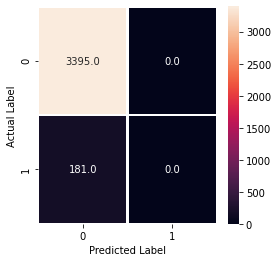

In [20]:
y_test = np.asarray(y_test)
y_pred = model.predict_classes(x_test)

print("Accuracy score of model is {}%".format(accuracy_score(y_pred=y_pred,y_true=y_test)*100))

plt.subplots(figsize=(4,4))
conf_matrix = confusion_matrix(y_pred=y_pred,y_true=y_test)
sns.heatmap(conf_matrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()
